## Heart Stroke Prediction

#### Problem Statement

This dataset helps us figure out if someone might have a stroke. It's a big deal because strokes are the second leading cause of death globally, making up about 11% of all deaths, according to the World Health Organization (WHO). The dataset looks at things like gender, age, different diseases, and whether someone smokes. Each row of data tells us important details about a person. By studying this information, we're trying to find patterns that can help predict who might be at risk for a stroke. The goal is to use this data to improve how we identify and manage factors that can lead to strokes, making healthcare more proactive and effective. The dataset contains +5.1k rows and 12 columns to explore!

#### Info about columns
- **id**: A unique identifier for each person.
- **gender**: Gender of the person.
- **age**: Age of the person.
- **hypertension**: 0 if the person doesn't have hypertension, 1 if the person has hypertension.
- **heart_disease**: 0 if the person doesn't have any heart diseases, 1 if the person has a heart disease.
- **ever_married**: Yes if the person is married, No otherwise.
- **work_type**: The type of occupation of the person.
- **Residence_type**: Area type of residence (Urban/ Rural).
- **avg_glucose_level**: Average glucose level in the blood of the person.
- **bmi**: Body mass index of the person.
- **smoking_status**: "formerly smoked", "never smoked", "smokes", "Unknown"*
- **stroke**: 1 if the person had a stroke or 0 if not.

 **Note**: "Unknown" in smoking_status means that the information is unavailable for this person.

#### Exploratory Data Analysis (EDA)
Is nothing but data exploration technique to understand the various aspects of the data. The idea is to check for relationship between variables and to check their distributions.

- It follow a systematic set of steps to explore the data in the most efficient way possible

Steps:

1).Understand the Data

2).Clean up the Data

3).Analysis of Relationship between variables

In [1]:
# Importing necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

#### 1. Understanding the Data

In [2]:
# Reading data
df=pd.read_csv('healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


#### Observation:-
From this quick overview, it comes to mind that we can use different variables correlations. Like age against stroke. We see that there are many variables that can be related to having a stroke: age, being married, work, etc.

##### Features or data points.

To find out how many columns, how many entries and if there are some missing values. We can use dataframe.info()

In [5]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
# Categorical info
cat_feat=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [8]:
#remove categorial data from our set to create the model. Can be added encoded later in the process.
num_feat = df.drop(cat_feat, axis = 1)
num_feat.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,9046,67.0,0,1,228.69,36.6,1
1,51676,61.0,0,0,202.21,NaN,1
2,31112,80.0,0,1,105.92,32.5,1
3,60182,49.0,0,0,171.23,34.4,1
4,1665,79.0,1,0,174.12,24.0,1


Another way to get the number of rows and columsn is using the df.shape panda feature. It returns a tuple. First one is for the rows and second one is for the number of columns.

In [9]:
df.shape

(5110, 12)

#### Describing the data statistically speaking function

The describe function allows us to have basic statistical information of the data. This is useful because it allows us to detect possible outliers or any strange data

In [10]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


#### Observation:-
We see that most people are on the 43 years of age. Then we can see that the mean of bmi of the population in study is at 28.

A healty range of a person BMI is between 18-25.

The BMI depends on different factors, Like height, muscle and body type.

Note on the avg of glucose level below 140 is normal. Between 140-199 is pre-diabetes.

In [11]:
# We don't want id column so we are droping it
num_feat = num_feat.drop('id', axis = 1)

In [12]:
num_feat.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [13]:
# Checkung for null values or missing values
num_feat.isnull().sum()

age                    0
hypertension           0
heart_disease          0
avg_glucose_level      0
bmi                  201
stroke                 0
dtype: int64

#### Observation :-
we have 201 missing values in bmi column.

In [14]:
#97.6 BMI? That is odd. Let's find out how many 
num_feat[num_feat['bmi']==97.6]

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
2128,17.0,1,0,61.67,97.6,0


In [15]:
df[df['bmi']==97.6]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2128,56420,Male,17.0,1,0,No,Private,Rural,61.67,97.6,Unknown,0


This is excessively strange. What should do with this data row. Only one entry with a very high bmi. Has hypertension. It's a young age male, who work in the private sector and live in a rural area with a glucose level that seems correct and has not suffered a stroke.

Proably we will need to do an imputation to update his bmi base on median bmi for his age and other related features.

But for now we are going to remove it for the purpose of fixing the distribution.

In [16]:
num_feat = num_feat[num_feat['bmi']!=97.6]
num_feat

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,67.0,0,1,228.69,36.6,1
1,61.0,0,0,202.21,NaN,1
2,80.0,0,1,105.92,32.5,1
3,49.0,0,0,171.23,34.4,1
4,79.0,1,0,174.12,24.0,1
...,...,...,...,...,...,...
5105,80.0,1,0,83.75,NaN,0
5106,81.0,0,0,125.20,40.0,0
5107,35.0,0,0,82.99,30.6,0
5108,51.0,0,0,166.29,25.6,0


In [17]:
#Checking again
num_feat[num_feat['bmi']>40]

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
21,52.0,1,0,233.29,48.9,1
30,57.0,1,0,212.08,44.2,1
60,56.0,0,0,185.17,40.4,1
66,70.0,0,0,221.58,47.5,1
79,43.0,0,0,143.43,45.9,1
...,...,...,...,...,...,...
5056,40.0,0,0,89.61,41.2,0
5057,49.0,0,0,69.92,47.6,0
5081,55.0,0,0,108.35,40.8,0
5097,68.0,0,0,91.68,40.8,0


In [18]:
num_feat.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5109.000000,5109.000000,5109.000000,5109.000000,4908.000000,5109.000000
mean,43.231748,0.097279,0.054022,106.156383,28.879238,0.048738
std,22.611882,0.296367,0.226084,45.283716,7.793377,0.215340
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.260000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.890000,28.050000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,92.000000,1.000000


In [19]:
num_feat[num_feat.bmi > 40].describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000
mean,46.169533,0.167076,0.029484,122.511523,45.762899,0.044226
std,15.021930,0.373503,0.169367,57.851146,6.082675,0.205850
min,13.000000,0.000000,0.000000,55.640000,40.100000,0.000000
25%,35.000000,0.000000,0.000000,79.480000,41.700000,0.000000
50%,47.000000,0.000000,0.000000,97.400000,43.800000,0.000000
75%,56.000000,0.000000,0.000000,176.260000,48.050000,0.000000
max,82.000000,1.000000,1.000000,261.670000,92.000000,1.000000


In [20]:
num_feat.groupby('stroke').mean()

,age,hypertension,heart_disease,avg_glucose_level,bmi
stroke,,,,,
0,41.976683,0.088683,0.047119,104.804387,28.808427
1,67.728193,0.265060,0.188755,132.544739,30.471292


The average age of people that has suffered a stroke are a 67 with a bmi of 30 or over.

So, it shows there is is more entries with abnormal Body Mass Index. Let's check for those with a BMI over 40 with obesity class 2

In [21]:
num_feat.groupby(num_feat.bmi > 40)[['stroke', 'hypertension', 'heart_disease']].sum()

,stroke,hypertension,heart_disease
bmi,,,
False,231,429,264
True,18,68,12


In [22]:
bmi_over_40 = num_feat[num_feat['bmi'] > 40 ]

In [23]:
bmi_over_40[num_feat['stroke'] == 1 ].sort_values(by='age')

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
79,43.0,0,0,143.43,45.9,1
113,45.0,0,0,224.10,56.6,1
88,47.0,0,0,86.94,41.1,1
191,51.0,1,0,112.16,42.5,1
21,52.0,1,0,233.29,48.9,1
109,53.0,0,0,64.17,41.5,1
107,54.0,0,0,191.82,40.4,1
60,56.0,0,0,185.17,40.4,1
30,57.0,1,0,212.08,44.2,1
80,59.0,0,0,96.16,44.1,1


We see that the corelation of suffering a stroke is not just age, but having a bmi over 40 and a higher sugar level.

<Axes: xlabel='bmi', ylabel='avg_glucose_level'>

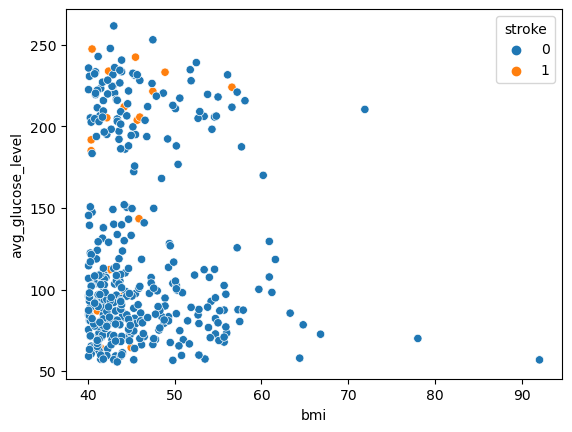

In [24]:
sns.scatterplot(x='bmi',y='avg_glucose_level',hue='stroke',data=bmi_over_40)

### Check for unique values

In [25]:
df.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

#### Observation:-
It seems the majorities of values are binaries, which mean that they are categorical values e.g. "yes" or "no" except for gender which is says it has 3 types. We need to check if that is not because a typo or blank entries.

The categorial variables with more different values are the following in ascending order:

1) smoking_status 4
2) work_type 5

In [26]:
df.gender.unique()

array(['Male', 'Female', 'Other'], dtype=object)

#### Distribution of gender

In [27]:
df.gender.value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

Given the fact the other gender is only 1 value. We can remove that data point from our study.

In [28]:
df = df[df['gender']!='Other']

In [29]:
df.smoking_status.unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [30]:
df.smoking_status.value_counts()

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: count, dtype: int64

In [31]:
df[df['smoking_status'] == 'Unknown']

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
23,64778,Male,82.0,0,1,Yes,Private,Rural,208.30,32.5,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5098,579,Male,9.0,0,0,No,children,Urban,71.88,17.5,Unknown,0
5101,36901,Female,45.0,0,0,Yes,Private,Urban,97.95,24.5,Unknown,0
5103,22127,Female,18.0,0,0,No,Private,Urban,82.85,46.9,Unknown,0
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0


In [32]:
#smokers and goverment jobs
smokers = df[df['smoking_status']=='smokes']

smokers.work_type.value_counts(normalize=True)

work_type
Private          0.688213
Self-employed    0.157161
Govt_job         0.152091
children         0.002535
Name: proportion, dtype: float64

### Age distribution of smokers

In [33]:
smokers['age'].groupby(smokers['age']).count()

age
10.0    1
12.0    1
13.0    1
16.0    2
17.0    4
       ..
78.0    7
79.0    9
80.0    7
81.0    5
82.0    6
Name: age, Length: 70, dtype: int64

Given the fact that of those who are smokers. Only a few smoke at young ages and at late ages as well. So, let's see if we can slice the data from 35 - 65 years of age.

In [34]:
age_smokers = smokers['age'].groupby(smokers['age']).count()

age_smokers[35:65].sort_values(ascending=False, axis=0)

age
54.0    22
52.0    20
50.0    19
40.0    19
56.0    19
44.0    19
47.0    19
49.0    19
53.0    18
43.0    17
45.0    17
60.0    16
61.0    15
39.0    15
55.0    15
48.0    15
65.0    14
51.0    14
42.0    14
38.0    14
57.0    13
36.0    12
58.0    12
59.0    12
63.0    12
46.0    11
35.0    10
41.0     9
37.0     9
62.0     9
64.0     9
Name: age, dtype: int64

According to this result we can see that the mayority of smokers account for more than 10 are effectively on the age range of 35 through 63. With the exception of less smokers at the age of 41, 37, 62 and 64 of age, only 9 smokers.

On the visualiaztion section we can plot this one out to see the histogram distribution.

In [35]:
#smokers and goverment jobs
unkn_smokers = df[df['smoking_status']=='Unknown']

unkn_smokers.work_type.value_counts(normalize=True)

work_type
Private          0.414508
children         0.400259
Self-employed    0.101036
Govt_job         0.079016
Never_worked     0.005181
Name: proportion, dtype: float64

In [36]:
df.work_type.unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

### Step 2: Cleaning the data

In [37]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

#### Observation:-
Questions: No missing values except for BMI. Should we need to fill those empty values

In [38]:
# percentage of missing values in BMI
df['bmi'].isnull().sum()/len(df)*100

3.9342337052260716

We have 4% of BMI missing data

In [39]:
#handling missing values
df['bmi'] = df['bmi'].fillna(round (df['bmi'].median(), 2))
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Checking for outliers: is a datapoint that differ from other observations

### Relationship Analysis

In [40]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [41]:
corelation = num_feat.corr()

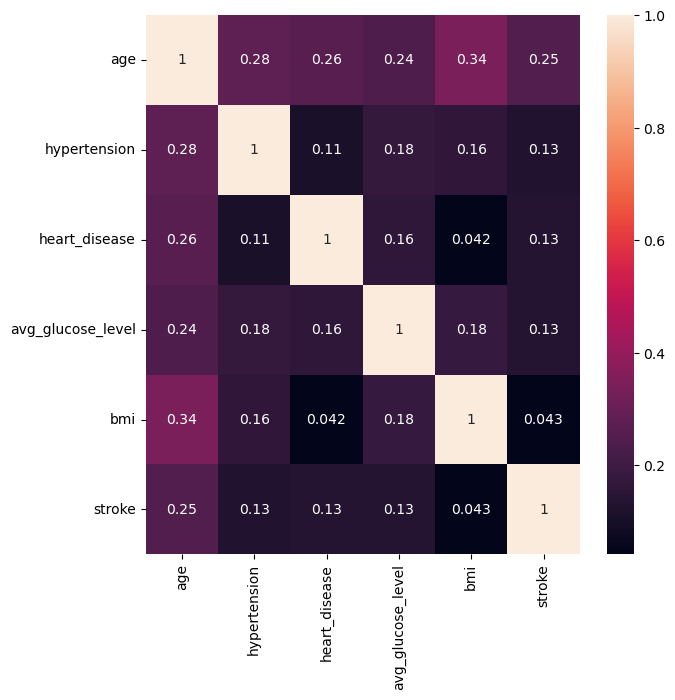

In [42]:
plt.figure(figsize=(7,7))
sns.heatmap(corelation, xticklabels =corelation.columns, yticklabels = corelation.columns, annot=True)
plt.show()

As we can see it looks that the more related variable to stroke is the age feature. We may consider to use a model to only use the wanted variables to remove id for example.

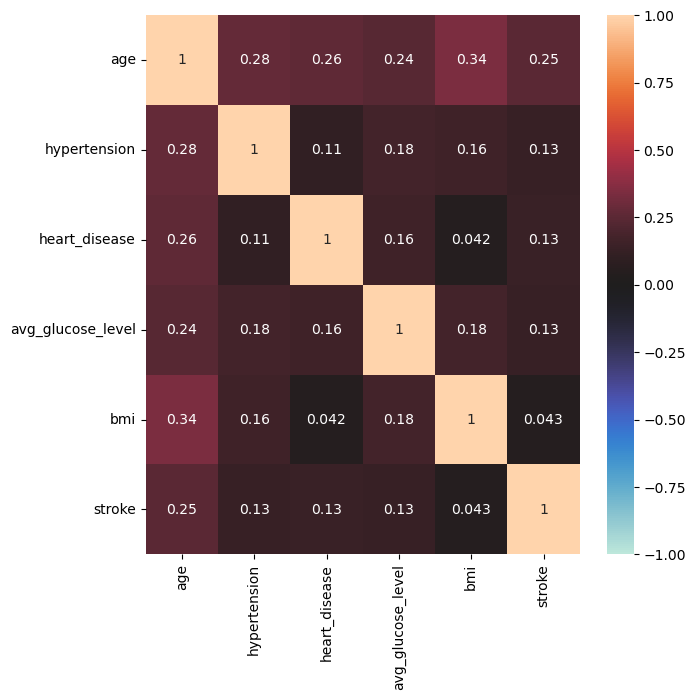

In [43]:
plt.figure(figsize=(7,7))
sns.heatmap(corelation, xticklabels =corelation.columns, yticklabels = corelation.columns,
            vmin=-1, vmax=1, center=0,annot=True)
plt.show()

### Data Visualizations

Checking the distribution of the target variable(stroke)

In [44]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

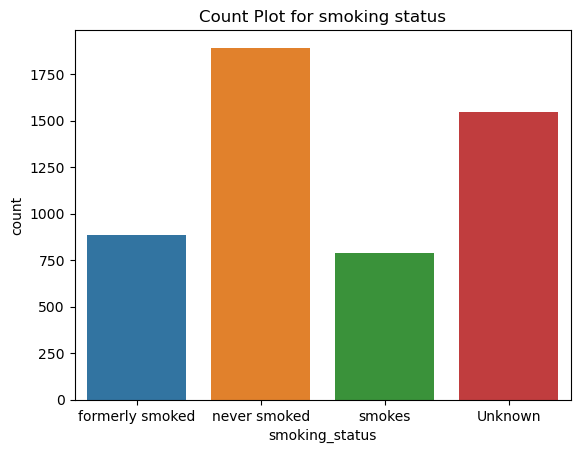

In [45]:
sns.countplot(x = 'smoking_status', data = df)
plt.title("Count Plot for smoking status")
plt.show()

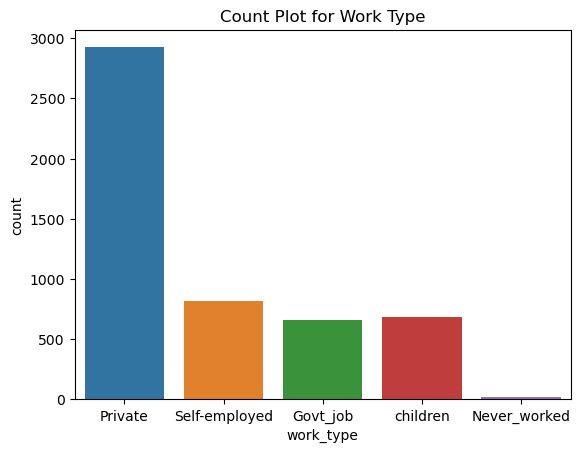

In [46]:
sns.countplot(x = 'work_type', data = df)
plt.title('Count Plot for Work Type')
plt.show()

In [47]:
num_data = num_feat

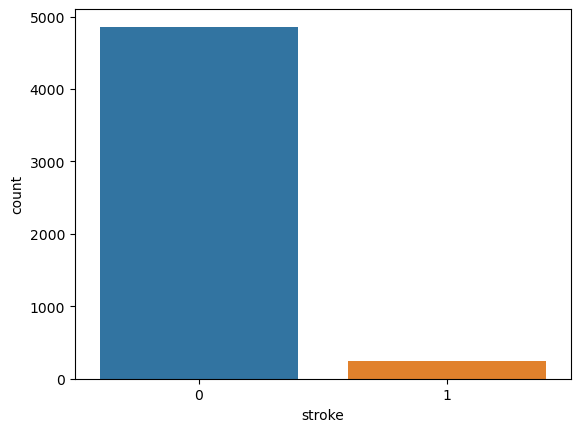

In [48]:
#Ploting the distribution of Stroke
sns.countplot(x='stroke', data=num_data)
plt.show()

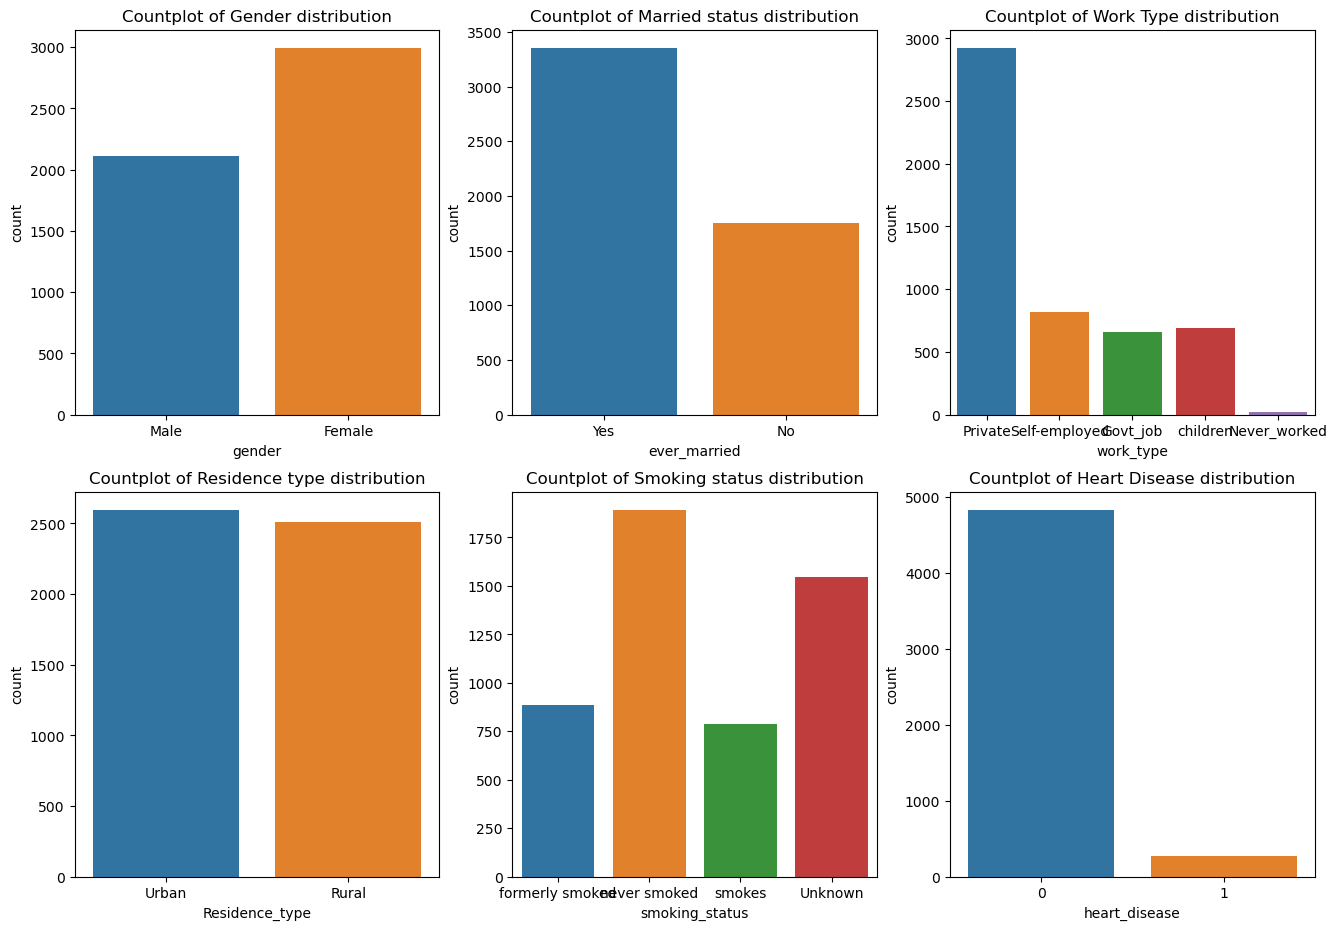

In [49]:
plt.figure(figsize = (16,11))
plt.subplot(2,3,1)
sns.countplot(x = 'gender', data = df)
plt.title('Countplot of Gender distribution')

plt.subplot(2,3,2)
sns.countplot(x = 'ever_married', data = df)
plt.title('Countplot of Married status distribution')

plt.subplot(2,3,3)
sns.countplot(x='work_type', data = df)
plt.title('Countplot of Work Type distribution')

plt.subplot(2,3,4)
sns.countplot(x = 'Residence_type', data = df)
plt.title('Countplot of Residence type distribution')

plt.subplot(2,3,5)
sns.countplot(x = 'smoking_status',data = df)
plt.title('Countplot of Smoking status distribution')

plt.subplot(2,3,6)
sns.countplot(x = 'heart_disease',data = df)
plt.title('Countplot of Heart Disease distribution')
plt.show()

### Distribution of BMI

In [50]:
num_data = num_feat
#handling missing values
num_data['bmi'] = num_data['bmi'].fillna(round (num_data['bmi'].median(), 2))

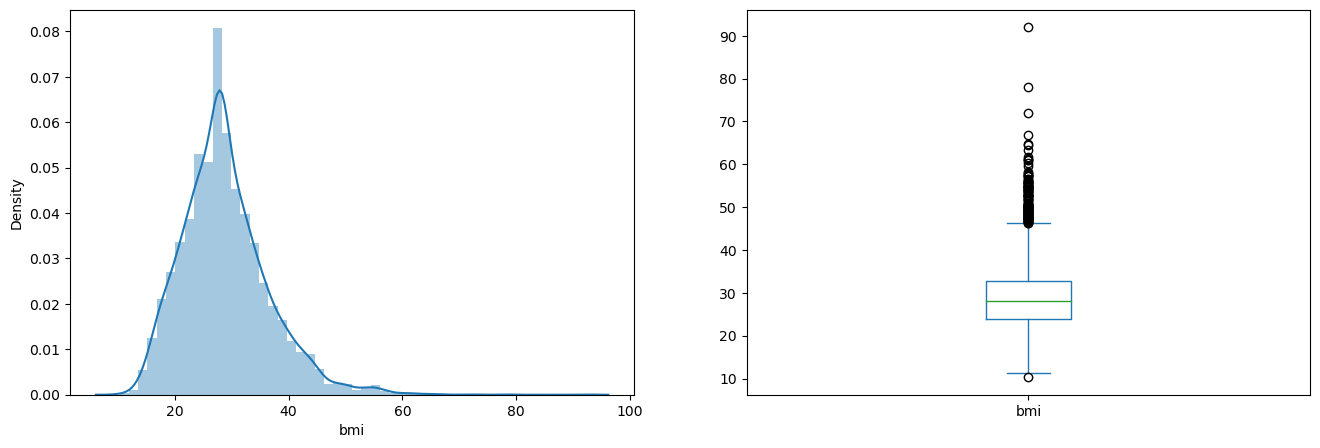

In [51]:
plt.figure(1)
plt.title('BMI Distribution before droping the abnormal entry')
plt.subplot(1,2,1), sns.distplot(num_data['bmi'])
plt.subplot(1,2,2), num_data['bmi'].plot.box(figsize=(16,5))
plt.show()

Stroke Distrution of people with a BMI over 40

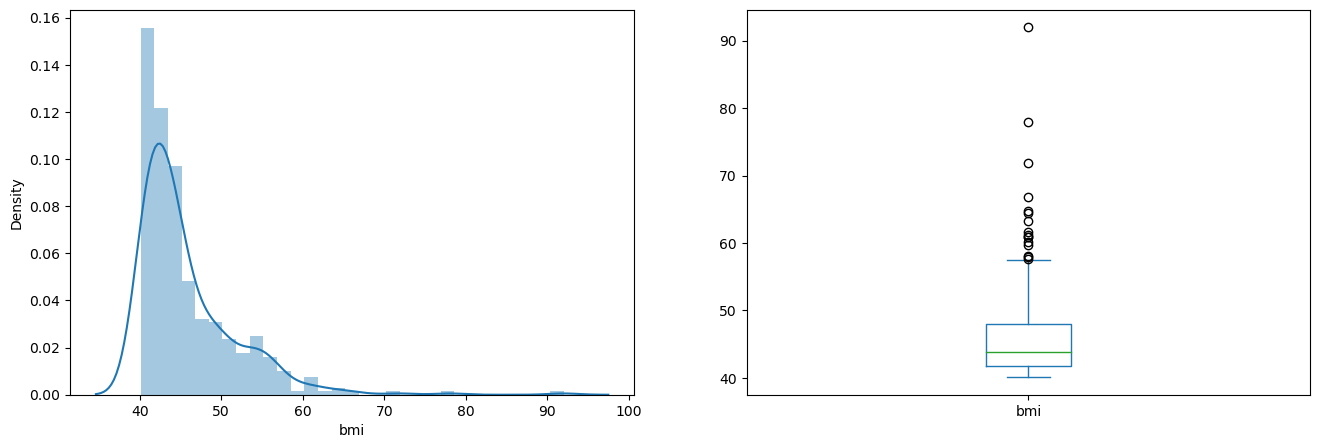

In [52]:
plt.figure(1)
plt.title('Stroke Distribution with BMI over 40')
plt.subplot(1,2,1), sns.distplot(bmi_over_40['bmi'])
plt.subplot(1,2,2), bmi_over_40['bmi'].plot.box(figsize=(16,5))
plt.show()

### Distribution of Age

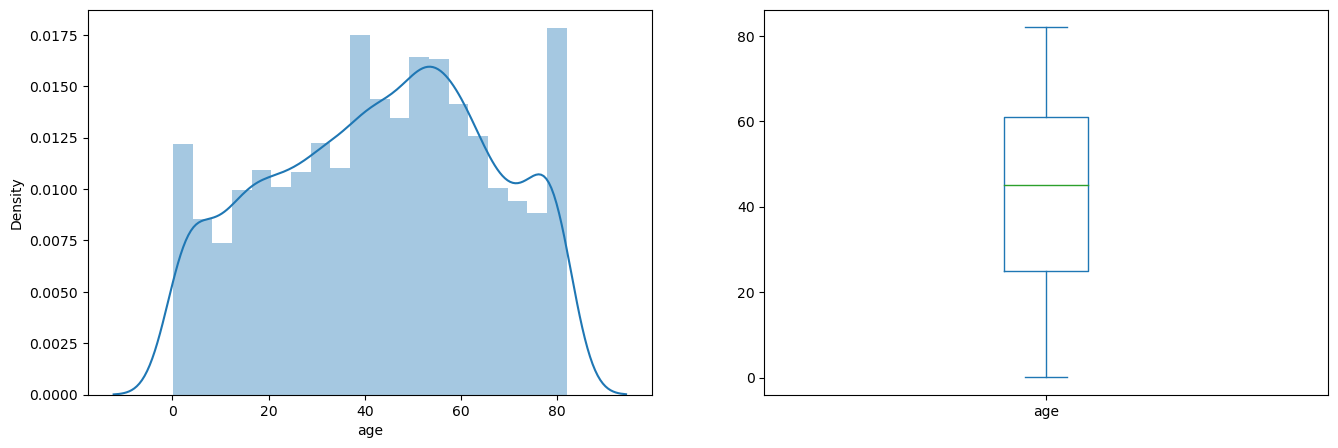

In [53]:
plt.figure(1)
plt.subplot(1,2,1), sns.distplot(df['age'])
plt.subplot(1,2,2), df['age'].plot.box(figsize=(16,5))
plt.show()

### Distribution of Heart Disease

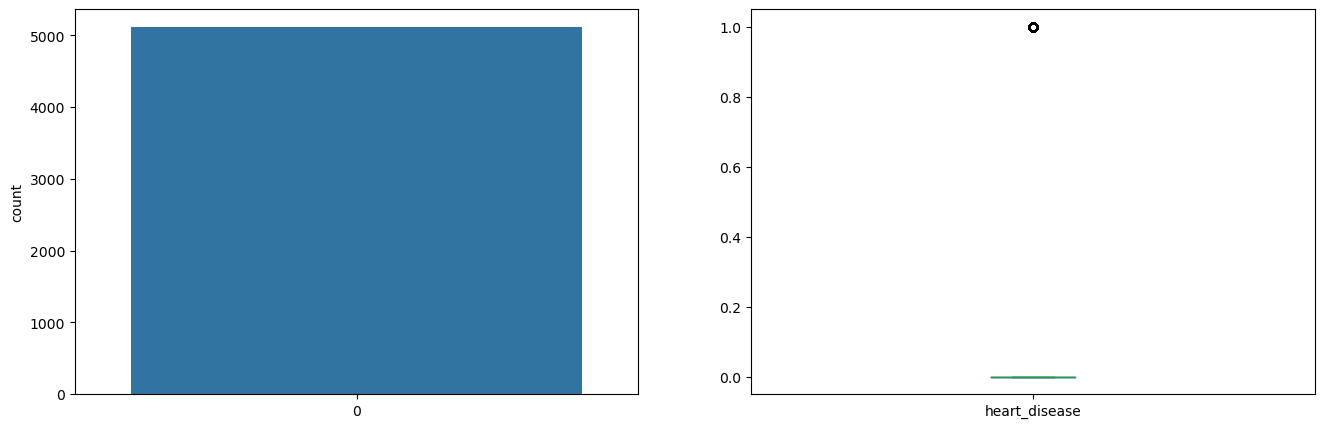

In [54]:
plt.figure(1)
plt.subplot(1,2,1), sns.countplot(df['heart_disease'])
plt.subplot(1,2,2), df['heart_disease'].plot.box(figsize=(16,5))
plt.show()

### Distribution of AVG Glucose Level

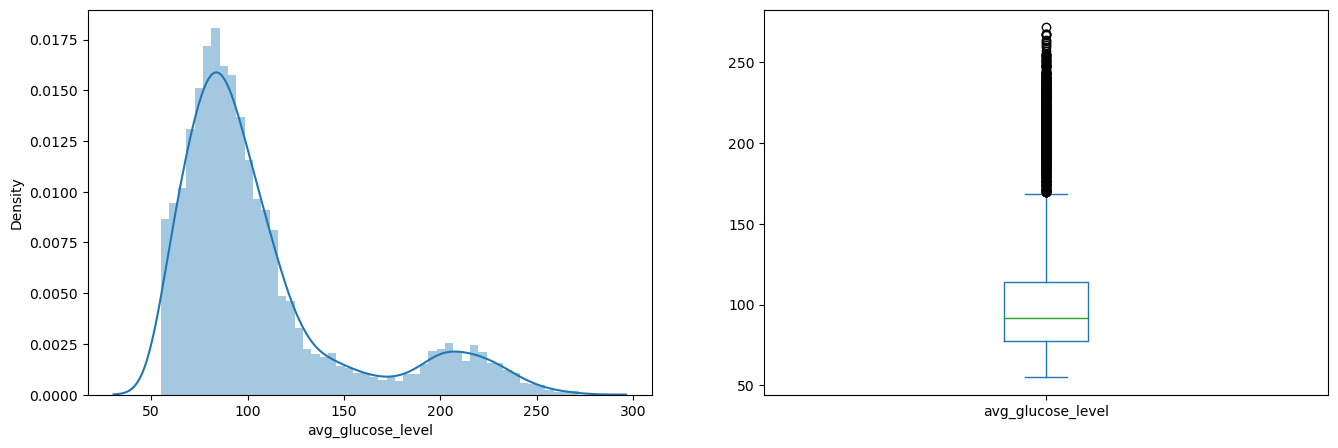

In [55]:
plt.figure(1)
plt.subplot(1,2,1), sns.distplot(df['avg_glucose_level'])
plt.subplot(1,2,2), df['avg_glucose_level'].plot.box(figsize=(16,5))
plt.show()

#### Plotting relationships in the dataset.
There are different ways to display relationships using a dataset. we can use pair plots, joint plots, correlations, etc. we will the use pairplot to find out relationships in the dataset.

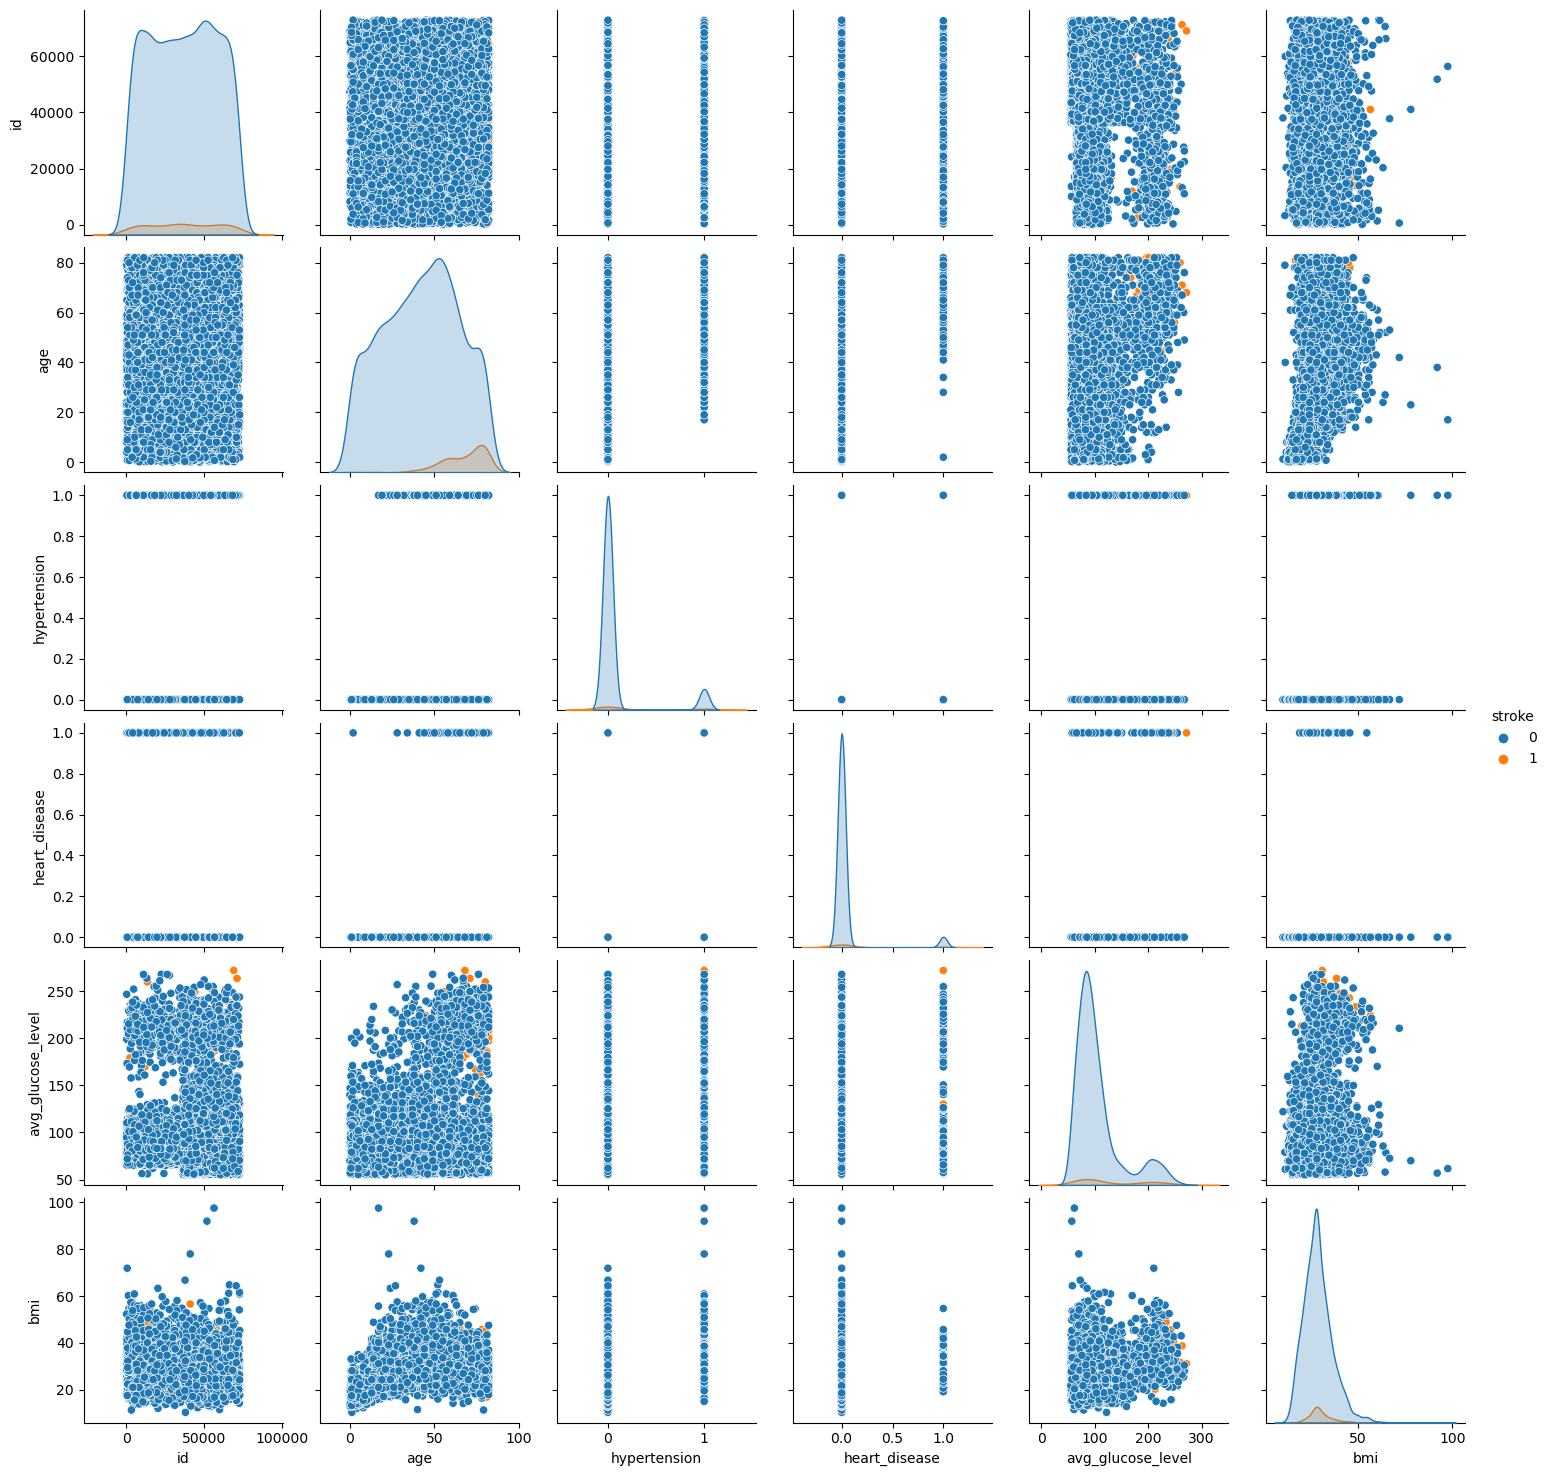

In [56]:
import warnings
warnings.filterwarnings('ignore')
sns.pairplot(data=df, hue= 'stroke')
plt.show()

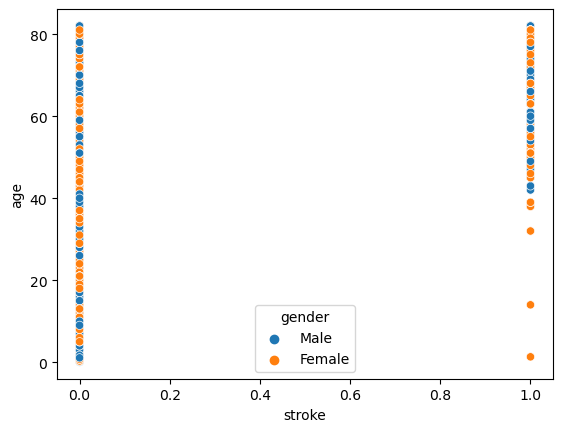

In [57]:
sns.scatterplot(x='stroke', y='age', hue='gender', data=df ) 
plt.show()

With this it seems that a confusion matrix and a logistic regression may whow a better relationship because this is showing that there is not a linear relationship.

#### Observation:-
From this bar chart we can clearly see that for people over 40 years old the majority suffered a stroke. We have an uptick at age 40 then it drops until about age 55 through 65 and drops again and goes all the way up at age 80.

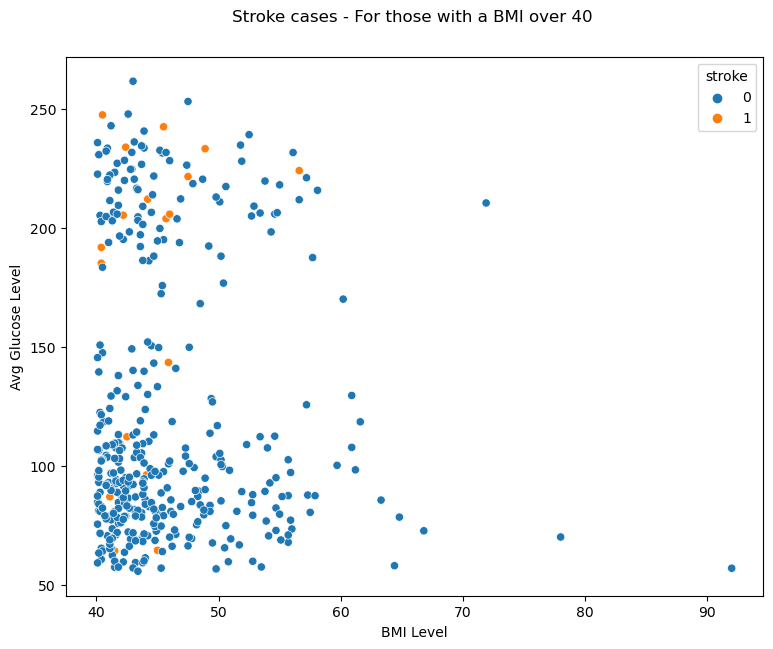

In [58]:
plt.figure(figsize = (9,7))
sns.scatterplot(x = 'bmi', y = 'avg_glucose_level', hue = 'stroke', data =bmi_over_40)
plt.title('Stroke cases - For those with a BMI over 40 ',y=1.05)

plt.xlabel('BMI Level')
plt.ylabel('Avg Glucose Level')
plt.show()

### Hypothesis Testing

Chi Square testing

In [59]:
from scipy.stats import chi2_contingency, ttest_ind
def chi2_dependency(data_df, x,y):
    ctab = pd.crosstab(data_df[x], data_df[y])
    stat, p, dof, expected = chi2_contingency(ctab)
    alpha1 = 0.05
    alpha2 = 0.01
    print('--------------Chi Squared Hypothesis Test Results-------------------')
    print('Variable X: ',x)
    print('Variable Y: ',y)
    if p<alpha1 and p > alpha2:
        print('P-value: ',p)
        print('We reject the NUll Hypothesis H0')
        print('There is some evidence to suggest that {} and {} are dependent'.format(x,y))
    if p < alpha1 and p < alpha2:
        print('P-value: ',p)
        print('We reject the NUll Hypothesis H0')
        print('There is substantial evidence to suggest that {} and {} are dependent'.format(x,y))
    else:
        print('P-value: ',p)
        print('We fail to reject the NUll Hypothesis H0')
        print('There is no evidence to suggest that {} and {} are independent'.format(x,y))

In [60]:
chi2_dependency(df,'gender','stroke')
chi2_dependency(df,'ever_married','stroke')
chi2_dependency(df,'hypertension','stroke')
chi2_dependency(df,'heart_disease','stroke')
chi2_dependency(df,'work_type','stroke')
chi2_dependency(df,'Residence_type','stroke')
chi2_dependency(df,'smoking_status','stroke')

--------------Chi Squared Hypothesis Test Results-------------------
Variable X:  gender
Variable Y:  stroke
P-value:  0.5598277580669416
We fail to reject the NUll Hypothesis H0
There is no evidence to suggest that gender and stroke are independent
--------------Chi Squared Hypothesis Test Results-------------------
Variable X:  ever_married
Variable Y:  stroke
P-value:  1.6862856191673454e-14
We reject the NUll Hypothesis H0
There is substantial evidence to suggest that ever_married and stroke are dependent
--------------Chi Squared Hypothesis Test Results-------------------
Variable X:  hypertension
Variable Y:  stroke
P-value:  1.688936253410575e-19
We reject the NUll Hypothesis H0
There is substantial evidence to suggest that hypertension and stroke are dependent
--------------Chi Squared Hypothesis Test Results-------------------
Variable X:  heart_disease
Variable Y:  stroke
P-value:  2.120831133146208e-21
We reject the NUll Hypothesis H0
There is substantial evidence to suggest

#### Observation:-
- Gender and Residential Type do not seem to have an impact on stroke
- Smoking Status, Work Type, Heart Disease, Hypertension and Married status have an impact on stroke

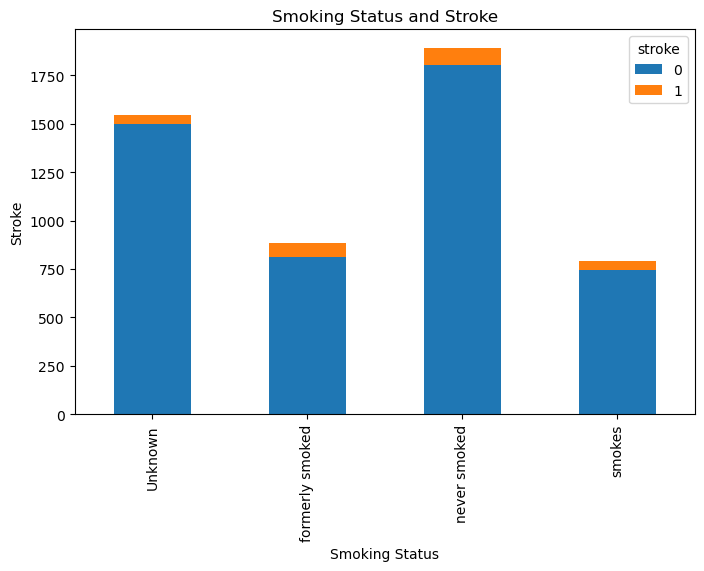

In [61]:
ctab = pd.crosstab(df['smoking_status'], df['stroke'])


ctab.plot.bar(stacked = True, figsize = (8,5))
plt.xlabel('Smoking Status')
plt.ylabel('Stroke')
plt.title('Smoking Status and Stroke')
plt.show()

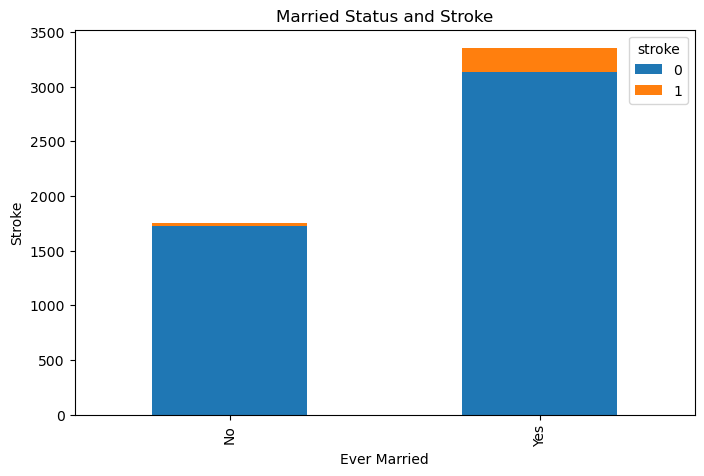

Ratio of stroke affected from ever_married class 0.07426185505517446
Ratio of stroke affected from never married class 0.1417995444191344


In [62]:
ctab = pd.crosstab(df['ever_married'], df['stroke'])

ctab.plot.bar(stacked = True, figsize = (8,5))
plt.xlabel('Ever Married')
plt.ylabel('Stroke')
plt.title('Married Status and Stroke')
plt.show()

print('Ratio of stroke affected from ever_married class',
      len(df[df['stroke']==1])/len(df[df['ever_married']=='Yes']))
      
print('Ratio of stroke affected from never married class',
      len(df[df['stroke']==1])/len(df[df['ever_married']=='No']))

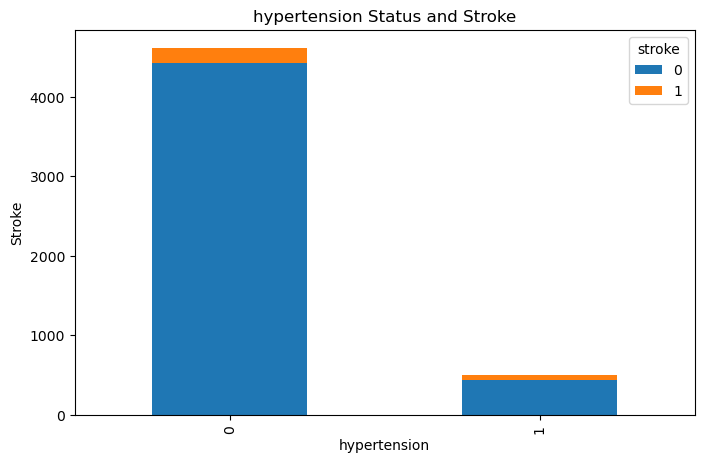

Ratio of stroke affected from hypertension=1 class 0.5
Ratio of stroke affected from no hypertension class 0.054001301236174366


In [63]:
ctab = pd.crosstab(df['hypertension'], df['stroke'])

ctab.plot.bar(stacked = True, figsize = (8,5))
plt.xlabel('hypertension')
plt.ylabel('Stroke')
plt.title('hypertension Status and Stroke')
plt.show()

print('Ratio of stroke affected from hypertension=1 class',
      len(df[df['stroke']==1])/len(df[df['hypertension']==1]))
      
print('Ratio of stroke affected from no hypertension class',
      len(df[df['stroke']==1])/len(df[df['hypertension']==0]))

#### Observation :-
Almost 50% of samples having hypertension were found to have suffered stroke

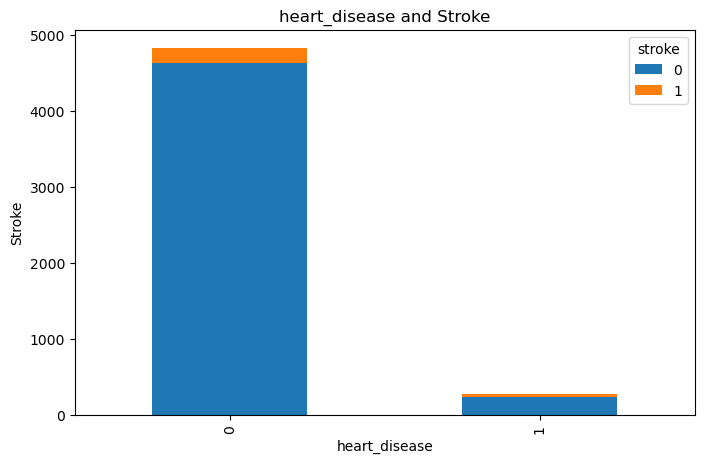

Ratio of stroke affected from heart_disease = 1 class 0.9021739130434783
Ratio of stroke affected from no heart_disease class 0.051520794537554315


In [64]:
ctab = pd.crosstab(df['heart_disease'], df['stroke'])

ctab.plot.bar(stacked = True, figsize = (8,5))
plt.xlabel('heart_disease')
plt.ylabel('Stroke')
plt.title('heart_disease and Stroke')
plt.show()

print('Ratio of stroke affected from heart_disease = 1 class',
      len(df[df['stroke']==1])/len(df[df['heart_disease']==1]))
      
print('Ratio of stroke affected from no heart_disease class',
      len(df[df['stroke']==1])/len(df[df['heart_disease']==0]))

#### Observation:-
Almost 90% of samples having heartdisease were found to have suffered stroke

### T-tests

We will perform 2 sample t-test on 'BMI' column to check if the mean BMI of stroke group is different from the non stroke group.

Before performing this test we will check ratio of variance of each group

In [65]:
df[df['stroke']==0]['bmi'].var()/df[df['stroke']==1]['bmi'].var()

1.7603935088362457

Since the ratio of variance < 4, we will assume them to be having equal variance

In [66]:
statistic, pval = ttest_ind(a=df[df['stroke']==0]['bmi']  , b = df[df['stroke']==1]['bmi'], equal_var=True)
pval

0.009914906905753041

- Since pvalue < 0.01, we reject the Null Hypothesis H0
- We can conclude that the population BMI mean of stroke vs non-stroke groups are different

Now we can start creating our model and start our predictions. Also, we can include other features to see if there is any other related variable.

### Data Transformation

In [67]:
target_col = ['stroke']
num_cols = ['id', 'age', 'avg_glucose_level', 'bmi']
cat_cols = [col for col in df.columns if col not in num_cols+target_col]

### Label encoding

Label encode the binary categorical columns containing strings

In [68]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])
df['ever_married'] = label_encoder.fit_transform(df['ever_married'])
df['Residence_type'] = label_encoder.fit_transform(df['Residence_type'])
df['work_type'] = label_encoder.fit_transform(df['work_type'])
df['smoking_status'] = label_encoder.fit_transform(df['smoking_status'])

In [69]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.1,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,1,2,1,83.75,28.1,2,0
5106,44873,0,81.0,0,0,1,3,1,125.20,40.0,2,0
5107,19723,0,35.0,0,0,1,3,0,82.99,30.6,2,0
5108,37544,1,51.0,0,0,1,2,0,166.29,25.6,1,0


One-hot encode the multi category columns

In [70]:
data = pd.get_dummies(df, prefix = ['work_type'], columns = ['work_type'])
data = pd.get_dummies(df, prefix = ['smoking_status'], columns = ['smoking_status'])

### Training the Data
We will now split our dataset before we train it. X will contain all the Independent variables while y will have the Dependent variable ('stroke')

In [71]:
#Splitting the dataset
from sklearn.model_selection import train_test_split
x = df.drop(columns=['id','stroke'],axis=1)
y = df['stroke']

After successfully splitting the dataset, let us train it using train_test_split.

In [72]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=1)

In [73]:
x_train.shape

(3576, 10)

In [74]:
x_test.shape

(1533, 10)

In [75]:
y_train.shape

(3576,)

In [76]:
y_test.shape

(1533,)

### Building the Models
As I stated earlier, we will use four models i.e. Random Forests, Decision Trees, Support Vector Machine and XGBoost to get the best accuracy score. ‘Accuracy’ metric is used to evaluate models. It is the ratio of the number of correctly predicted instances in a dataset divided by the total number of instances in the dataset. We will proceed further to explore more metrics to determine the best model.

#### Training the Logistic Regression Model

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc

In [78]:
# Create a Logistic Regression model
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)

LogisticRegression()

In [79]:
# Make predictions on the test set
y_pred_LR = logistic_model.predict(x_test)
y_pred_LR

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [80]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred_LR)
conf_mat

array([[1446,    4],
       [  80,    3]], dtype=int64)

In [81]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [82]:
# Breaking down the formula for Accuracy
lr_accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
lr_accuracy

0.9452054794520548

In [83]:
# Precison
lr_precision = true_positive/(true_positive+false_positive)
lr_precision

0.9972413793103448

In [84]:
# Recall
lr_recall = true_positive/(true_positive+false_negative)
lr_recall

0.9475753604193972

In [85]:
# F1 Score
lr_f1 = 2*(lr_recall * lr_precision) / (lr_recall + lr_precision)
lr_f1

0.9717741935483871

In [86]:
lr_training_score=logistic_model.score(x_train,y_train)
print("Training score :",lr_training_score)

Training score : 0.9527404921700223


In [87]:
lr_testing_score=logistic_model.score(x_test,y_test)
print("Testing score :",lr_testing_score)

Testing score : 0.9452054794520548


#### Training the Decision tree Model

In [88]:
from sklearn.tree import DecisionTreeClassifier

In [89]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(x_train, y_train)

DecisionTreeClassifier()

In [90]:
# Make predictions on the test set
y_pred_dt = dt_classifier.predict(x_test)
y_pred_dt

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [91]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred_dt)
conf_mat

array([[1394,   56],
       [  77,    6]], dtype=int64)

In [92]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [93]:
# Accuracy
dt_accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
print("Accuracy:", dt_accuracy)

Accuracy: 0.91324200913242


In [94]:
# Precison
dt_precision = true_positive/(true_positive+false_positive)
dt_precision

0.9613793103448276

In [95]:
# Recall
dt_recall = true_positive/(true_positive+false_negative)
dt_recall

0.947654656696125

In [96]:
# F1 Score
dt_f1 = 2*(dt_recall * dt_precision) / (dt_recall + dt_precision)
dt_f1

0.9544676480657308

In [97]:
dt_training_score = dt_classifier.score(x_train, y_train)
print("Training Score:", dt_training_score)

Training Score: 1.0


In [98]:
dt_testing_score = dt_classifier.score(x_test, y_test)
print("Testing Score:", dt_testing_score)

Testing Score: 0.91324200913242


#### Training the SGD Classifier

In [99]:
from sklearn.linear_model import SGDClassifier
sgd_classifier = SGDClassifier()
sgd_classifier.fit(x_train, y_train)

SGDClassifier()

In [100]:
# Making predictions on test data
y_pred_sgd = sgd_classifier.predict(x_test)

In [101]:
y_pred_sgd

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [102]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred_sgd)
conf_mat

array([[1450,    0],
       [  83,    0]], dtype=int64)

In [103]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [104]:
# Accuracy
sgd_accuracy=(true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
sgd_accuracy

0.9458577951728636

In [105]:
# Precision 
sgd_precision = true_positive/(true_positive+false_positive)
sgd_precision

1.0

In [106]:
# Recall
sgd_recall= true_positive/(true_positive+false_negative)
sgd_recall

0.9458577951728636

In [107]:
# F1 score
sgd_f1= 2*(sgd_recall*sgd_precision)/(sgd_recall+sgd_precision)
sgd_f1

0.972175662085149

In [108]:
sgd_training_score = sgd_classifier.score(x_train, y_train)
print("Training Score:", sgd_training_score)

Training Score: 0.953579418344519


In [109]:
sgd_testing_score = sgd_classifier.score(x_train, y_train)
print("Testing Score:", sgd_testing_score)

Testing Score: 0.953579418344519


#### Training the KNN Classifier

In [110]:
from sklearn.neighbors import KNeighborsClassifier
kn_classifier = KNeighborsClassifier(n_neighbors = 23, metric = 'minkowski', p = 2)
kn_classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=23)

In [111]:
# Making predictions on test data
y_pred_knn = kn_classifier.predict(x_test)
y_pred_knn

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [112]:
#Confusion matrix
conf_mat = confusion_matrix(y_test,y_pred_knn)
conf_mat

array([[1450,    0],
       [  83,    0]], dtype=int64)

In [113]:
true_positive=conf_mat[0][0]
false_positive=conf_mat[0][1]
false_negative=conf_mat[1][0]
true_negative=conf_mat[1][1]

In [114]:
# Accuracy
kn_accuracy=(true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
kn_accuracy

0.9458577951728636

In [115]:
#Precision
kn_precision=true_positive/(true_positive+false_positive)
kn_precision

1.0

In [116]:
#Recall
kn_recall = true_positive/(true_positive+false_negative)
kn_recall

0.9458577951728636

In [117]:
# F1_Score
kn_f1=2*(kn_recall*kn_precision)/(kn_recall+kn_precision)
kn_f1

0.972175662085149

In [118]:
kn_training_score = kn_classifier.score(x_train, y_train)
print("Training Score:", kn_training_score)

Training Score: 0.953579418344519


In [119]:
kn_testing_score = kn_classifier.score(x_test, y_test)
print("Testing Score:", kn_testing_score)

Testing Score: 0.9458577951728636


#### Training Random Forest Model

In [120]:
from sklearn.ensemble import RandomForestClassifier

In [121]:
# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [122]:
# Make predictions on the test set
y_pred_RF = rf_classifier.predict(x_test)
y_pred_RF

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [123]:
# confusion matrix
conf_mat=confusion_matrix(y_test,y_pred_RF)
conf_mat

array([[1446,    4],
       [  83,    0]], dtype=int64)

In [124]:
true_positive=conf_mat[0][0]
false_positive=conf_mat[0][1]
false_negative=conf_mat[1][0]
true_negative=conf_mat[1][1]

In [125]:
# Accuracy
rf_accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
rf_accuracy

0.9432485322896281

In [126]:
# Precision
rf_precision=true_positive/(true_positive+false_positive)
rf_precision

0.9972413793103448

In [127]:
# Recall
rf_recall=true_positive/(true_positive+false_negative)
rf_recall

0.9457161543492478

In [128]:
# F1_score
rf_f1=2*(rf_recall*rf_precision)/(rf_recall+rf_precision)
rf_f1

0.97079556898288

In [129]:
rf_training_score = rf_classifier.score(x_train, y_train)
print("Training Score:", rf_training_score)

Training Score: 1.0


In [130]:
rf_testing_score = rf_classifier.score(x_test, y_test)
print("Testing Score:", rf_testing_score)

Testing Score: 0.9432485322896281


#### Training XGBoost Classifier

In [131]:
from xgboost import XGBClassifier
xgb1 = XGBClassifier(n_estimators = 250)
xgb1.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=250, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [132]:
preds = xgb1.predict(x_test)
print(confusion_matrix(y_test, preds))

[[1429   21]
 [  77    6]]


In [133]:
true_positive=conf_mat[0][0]
false_positive=conf_mat[0][1]
false_negative=conf_mat[1][0]
true_negative=conf_mat[1][1]

In [134]:
# Accuracy
xg_accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
xg_accuracy

0.9432485322896281

In [135]:
# Precision
xg_precision=true_positive/(true_positive+false_positive)
xg_precision

0.9972413793103448

In [136]:
# Recall
xg_recall=true_positive/(true_positive+false_negative)
xg_recall

0.9457161543492478

In [137]:
# F1_score
xg_f1=2*(rf_recall*rf_precision)/(rf_recall+rf_precision)
xg_f1

0.97079556898288

In [138]:
xg_training_score = xgb1.score(x_train, y_train)
print("Training Score:", xg_training_score)

Training Score: 1.0


In [139]:
xg_testing_score = xgb1.score(x_train, y_train)
print("Training Score:", xg_testing_score)

Training Score: 1.0


### FINAL CONCLUSIONS

In [140]:
Index=['Accuracy_Score','Precision_Score','Recall_Score','F1_Score','Train_Score','Test_Score']

In [141]:
conclusion = pd.DataFrame({'Logistic Regression_Model':[lr_accuracy,lr_precision,lr_recall,lr_f1,lr_training_score,lr_testing_score],
                           'DT_Model':[dt_accuracy,dt_precision,dt_recall,dt_f1,dt_training_score,dt_testing_score],
                           'SGD_Model':[sgd_accuracy,sgd_precision,sgd_recall,sgd_f1,sgd_training_score,sgd_testing_score],
                            'KNN_Model':[kn_accuracy,kn_precision,kn_recall,kn_f1,kn_training_score,kn_testing_score],
                            'Random Forest_Model':[rf_accuracy,rf_precision,rf_recall,rf_f1,rf_training_score,rf_testing_score],
                            'XGBoost_Classifier':[xg_accuracy,xg_precision,xg_recall,xg_f1,xg_training_score,xg_testing_score]},index=Index)

In [142]:
summary_models=(round(conclusion,2))
summary_models

,Logistic Regression_Model,DT_Model,SGD_Model,KNN_Model,Random Forest_Model,XGBoost_Classifier
Accuracy_Score,0.95,0.91,0.95,0.95,0.94,0.94
Precision_Score,1.00,0.96,1.00,1.00,1.00,1.00
Recall_Score,0.95,0.95,0.95,0.95,0.95,0.95
F1_Score,0.97,0.95,0.97,0.97,0.97,0.97
Train_Score,0.95,1.00,0.95,0.95,1.00,1.00
Test_Score,0.95,0.91,0.95,0.95,0.94,1.00


Given the nature of the problem and the dataset characteristics, **XGBoost Classifier** could be a good starting point due to its interpretability and effectiveness in binary classification tasks.

#### Testing on foreign data

In [143]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_train)
sample_data = np.array([[1,45,0,1,1,3,1,171.23,34,2]])
sample_data = sc.transform(sample_data)

In [144]:
sample_data

array([[ 1.16970591,  0.07374887, -0.32886165,  4.22149886,  0.71289857,
         0.76422979,  0.99720748,  1.44624234,  0.68259305,  0.59312336]])

In [145]:
logistic_model.predict(sample_data)

array([0], dtype=int64)

In [146]:
dt_classifier.predict(sample_data)

array([0], dtype=int64)

In [147]:
sgd_classifier.predict(sample_data)

array([0], dtype=int64)

In [148]:
kn_classifier.predict(sample_data)

array([0], dtype=int64)

In [149]:
rf_classifier.predict(sample_data)

array([0], dtype=int64)

In [150]:
xgb1.predict(sample_data)

array([0])